In [20]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from glob import glob
import scipy as sp
import xarray as xr
#from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
from tqdm import tqdm_notebook
import cartopy.crs as ccrs
%matplotlib inline

In [21]:
Orig05 = nc.Dataset('/g/data/tm70/ek4684/hgrids/ocean_hgrid_1deg.nc')
New05 = nc.Dataset('/g/data/tm70/ek4684/hgrids/om3_grid_65_90_0.25_0.25_rotate_poly.nc')
static05 = nc.Dataset('/g/data/tm70/ek4684/hgrids/ocean_static_1deg.nc')

In [22]:
New05

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    grid_version: 0.2
    code_release_version: 2024.02
    git_hash: 9758ee96233846579868e22d86a7a07d3b711b42
    creationtime: Thu Jun 27 16:49:17 2024
    hostname: gadi-login-03.gadi.nci.org.au
    history: make_hgrid --grid_type tripolar_grid --nxbnd 2 --nybnd 8 --xbnd -280,80 --ybnd -78,-30,-10,0,10,30,65,90 --dlon 1.0,1.0 --dlat 0.2,1.0,0.3333333,0.3333333,0.33333333,1.0,0.25,0.25 --grid_name om3_grid_65_90_0.25_0.25_rotate_poly --center c_cell --rotate_poly
    dimensions(sizes): string(255), nx(720), ny(712), nxp(721), nyp(713)
    variables(dimensions): |S1 tile(string), float64 x(nyp, nxp), float64 y(nyp, nxp), float64 dx(nyp, nx), float64 dy(ny, nxp), float64 area(ny, nx), float64 angle_dx(nyp, nxp), |S1 arcx(string)
    groups: 

In [23]:
# Extract the variables
geolon = static05.variables['geolon'][:]
geolat = static05.variables['geolat'][:]
x = Orig05.variables['x'][:]
y = Orig05.variables['y'][:]
dx = Orig05.variables['dx'][:]
dx_new = New05.variables['dx'][:]
dy = Orig05.variables['dy'][:]
dy_new = New05.variables['dy'][:]
area = Orig05.variables['area'][:]
area_new = New05.variables['area'][:]
angle_dx = Orig05.variables['angle_dx'][:]
angle_dx_new = New05.variables['angle_dx'][:]
tlat_new05 = New05.variables['y'][1::2, 1::2]
tlon_new05 = New05.variables['x'][1::2, 1::2]

print(f"geolat_min: {geolat.min()}, max: {geolat.max()}")
print(f"geolon_max: {geolon.min()}, max: {geolon.max()}")

print(f"tlat_new05 min: {tlat_new05.min()}, max: {tlat_new05.max()}")
print(f"tlon_new05 min: {tlon_new05.min()}, max: {tlon_new05.max()}")

geolat_min: -77.87662506103516, max: 89.74871063232422
geolon_max: -279.9911193847656, max: 79.99111938476562
tlat_new05 min: -77.9, max: 89.83292879727915
tlon_new05 min: -279.99507949035984, max: 79.99507949035987


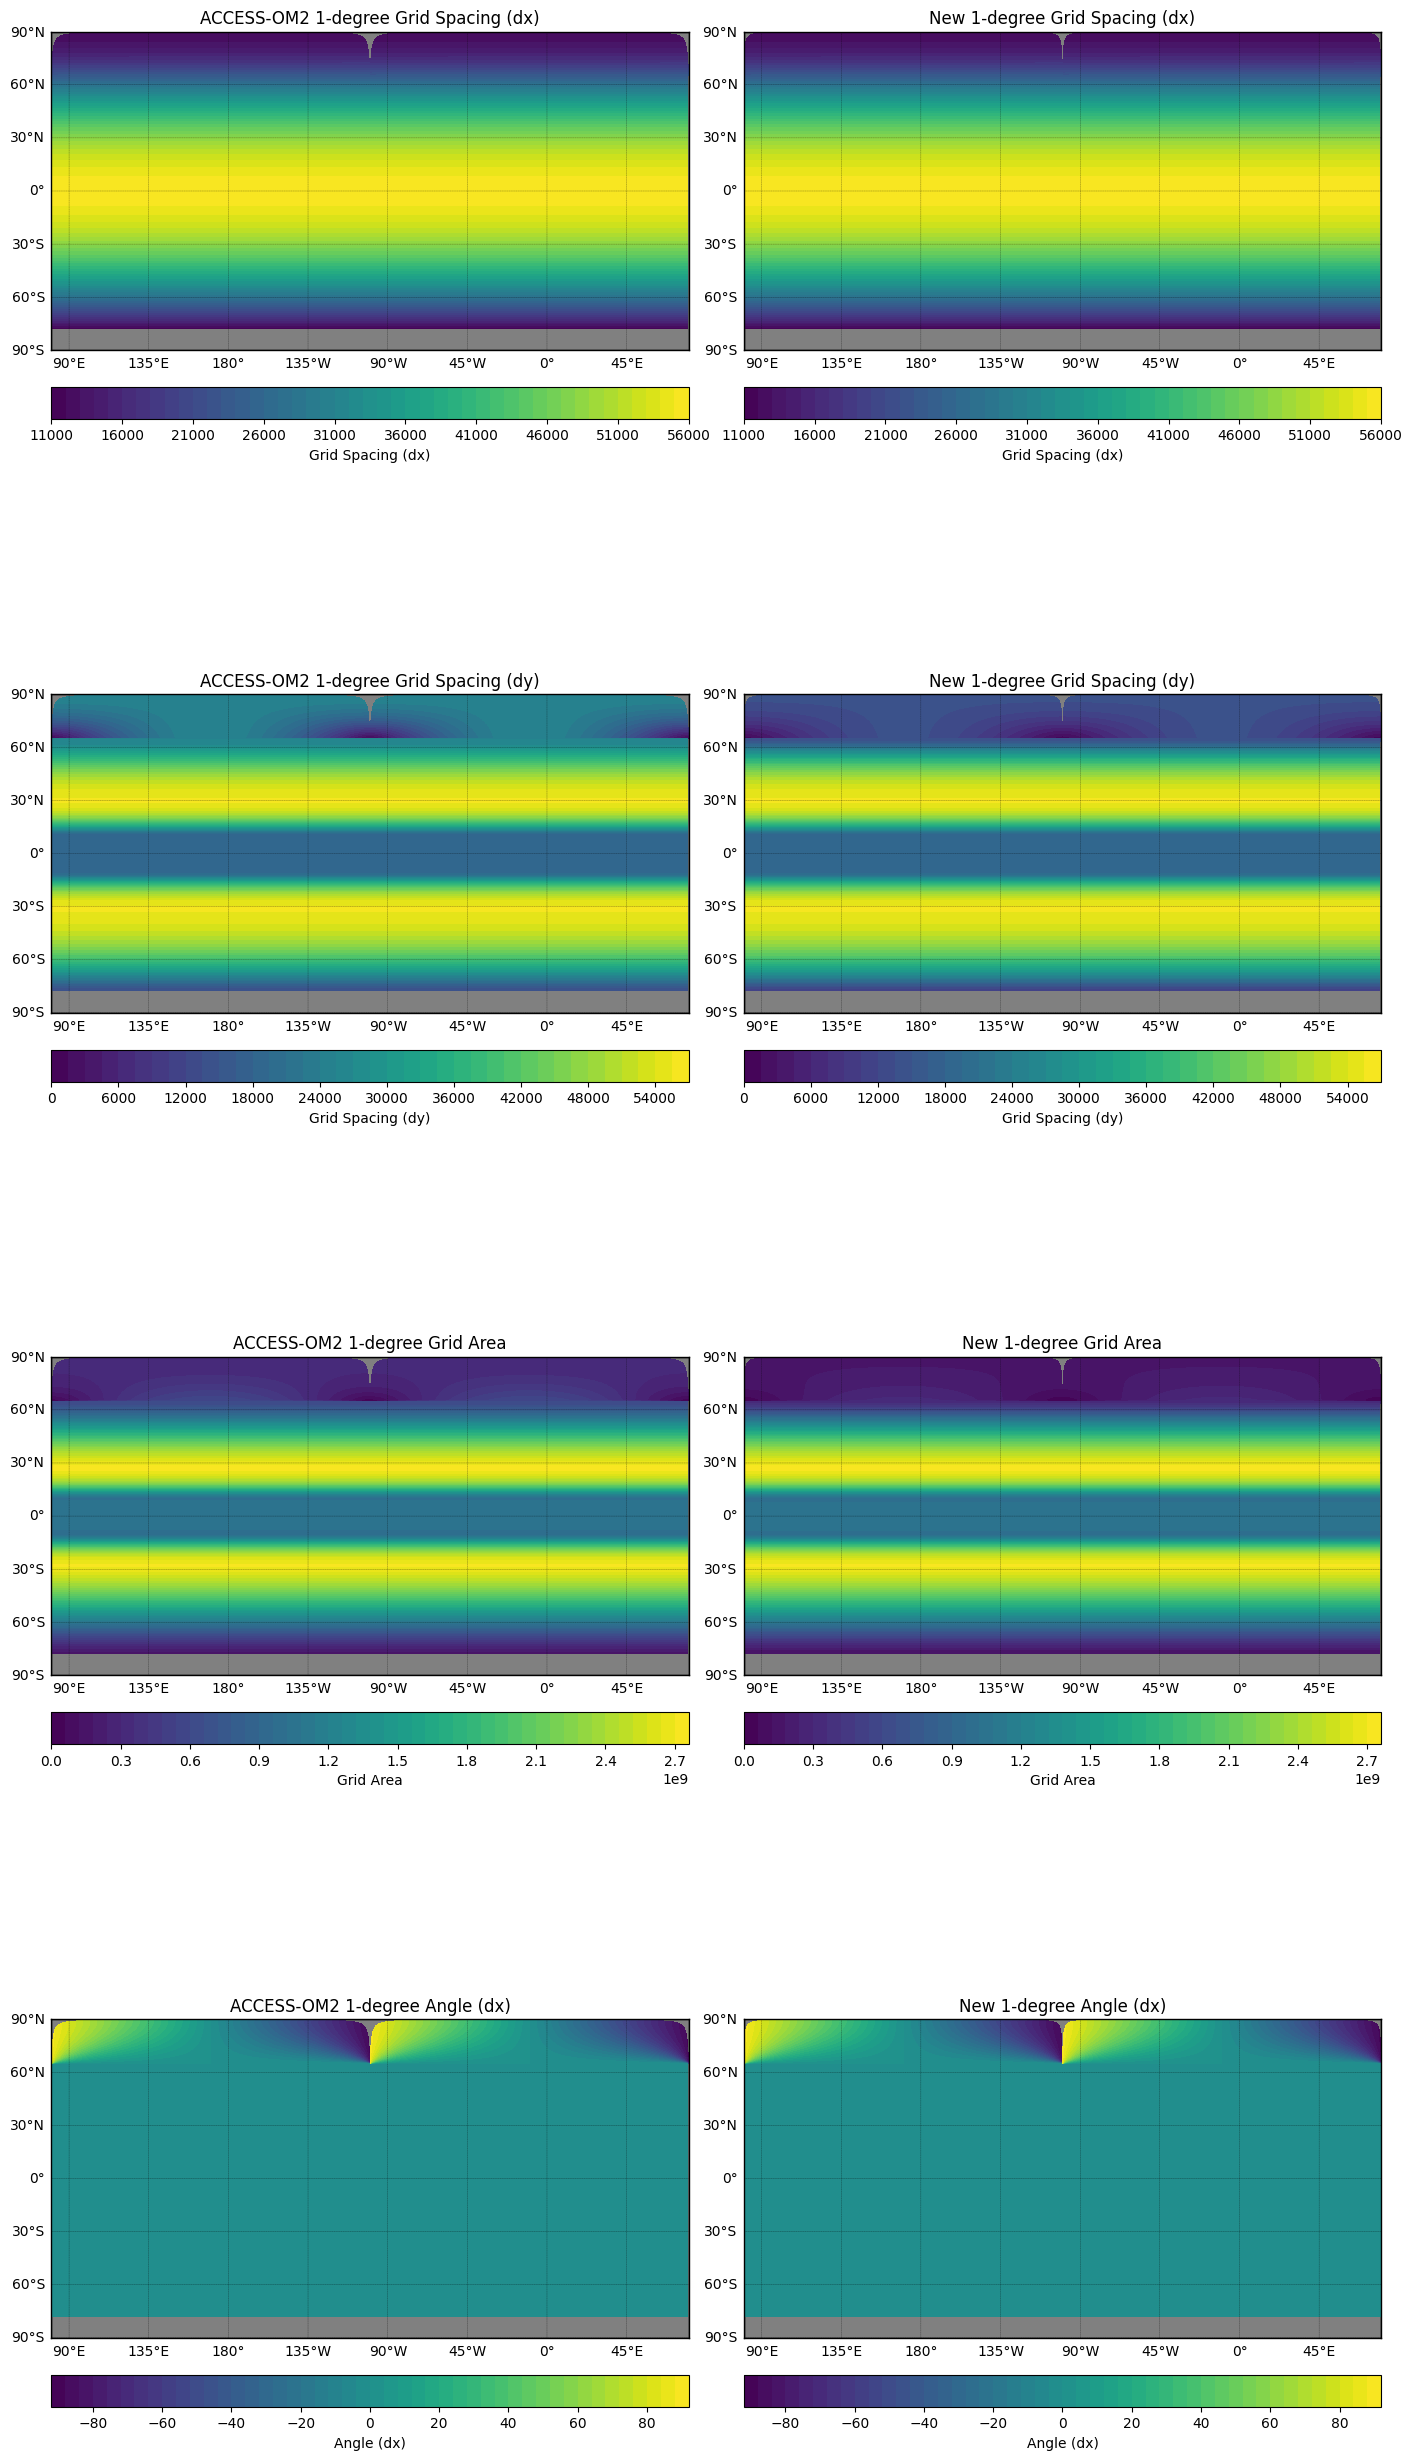

In [24]:
# Define the variables to plot
variables = ['dx', 'dy', 'area', 'angle_dx']
titles = ['Grid Spacing (dx)', 'Grid Spacing (dy)', 'Grid Area', 'Angle (dx)']
orig_data = [dx, dy, area, angle_dx]
new_data = [dx_new, dy_new, area_new, angle_dx_new]

# Create the figure and subplots
fig, axes = plt.subplots(len(variables), 2, figsize=(14, 7 * len(variables)))

for i, var in enumerate(variables):
    # Plot original grid data
    map1 = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-280, urcrnrlon=80, resolution='l', ax=axes[i, 0])
    map1.drawmapboundary(fill_color='gray')
    map1.drawparallels(np.arange(-90., 91., 30.), labels=[True, False, False, False], linewidth=0.25)
    map1.drawmeridians(np.arange(-270, 81, 45), labels=[False, False, False, True], linewidth=0.25)
    X, Y = map1(geolon, geolat)
    p1 = map1.contourf(X, Y, orig_data[i][1::2, 1::2], cmap=plt.cm.viridis,levels=50)
    axes[i, 0].set_title(f'ACCESS-OM2 1-degree {titles[i]}')
    
    # Plot new grid data
    map2 = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-280, urcrnrlon=80, resolution='l', ax=axes[i, 1])
    map2.drawmapboundary(fill_color='gray')
    map2.drawparallels(np.arange(-90., 91., 30.), labels=[True, False, False, False], linewidth=0.25)
    map2.drawmeridians(np.arange(-270, 81, 45), labels=[False, False, False, True], linewidth=0.25)
    X_new, Y_new = map2(tlon_new05, tlat_new05)
    p2 = map2.contourf(X_new, Y_new, new_data[i][1::2, 1::2], cmap=plt.cm.viridis, levels=50)
    axes[i, 1].set_title(f'New 1-degree {titles[i]}')
    # Add individual colorbars for each subplot
    cbar1 = fig.colorbar(p1, ax=axes[i, 0], orientation='horizontal', fraction=0.05, pad=0.05)
    cbar1.set_label(titles[i])

    cbar2 = fig.colorbar(p2, ax=axes[i, 1], orientation='horizontal', fraction=0.05, pad=0.05)
    cbar2.set_label(titles[i])    

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()
plt.show()

In [25]:
## Refinement in both the grids but the number of points within the refinement may change

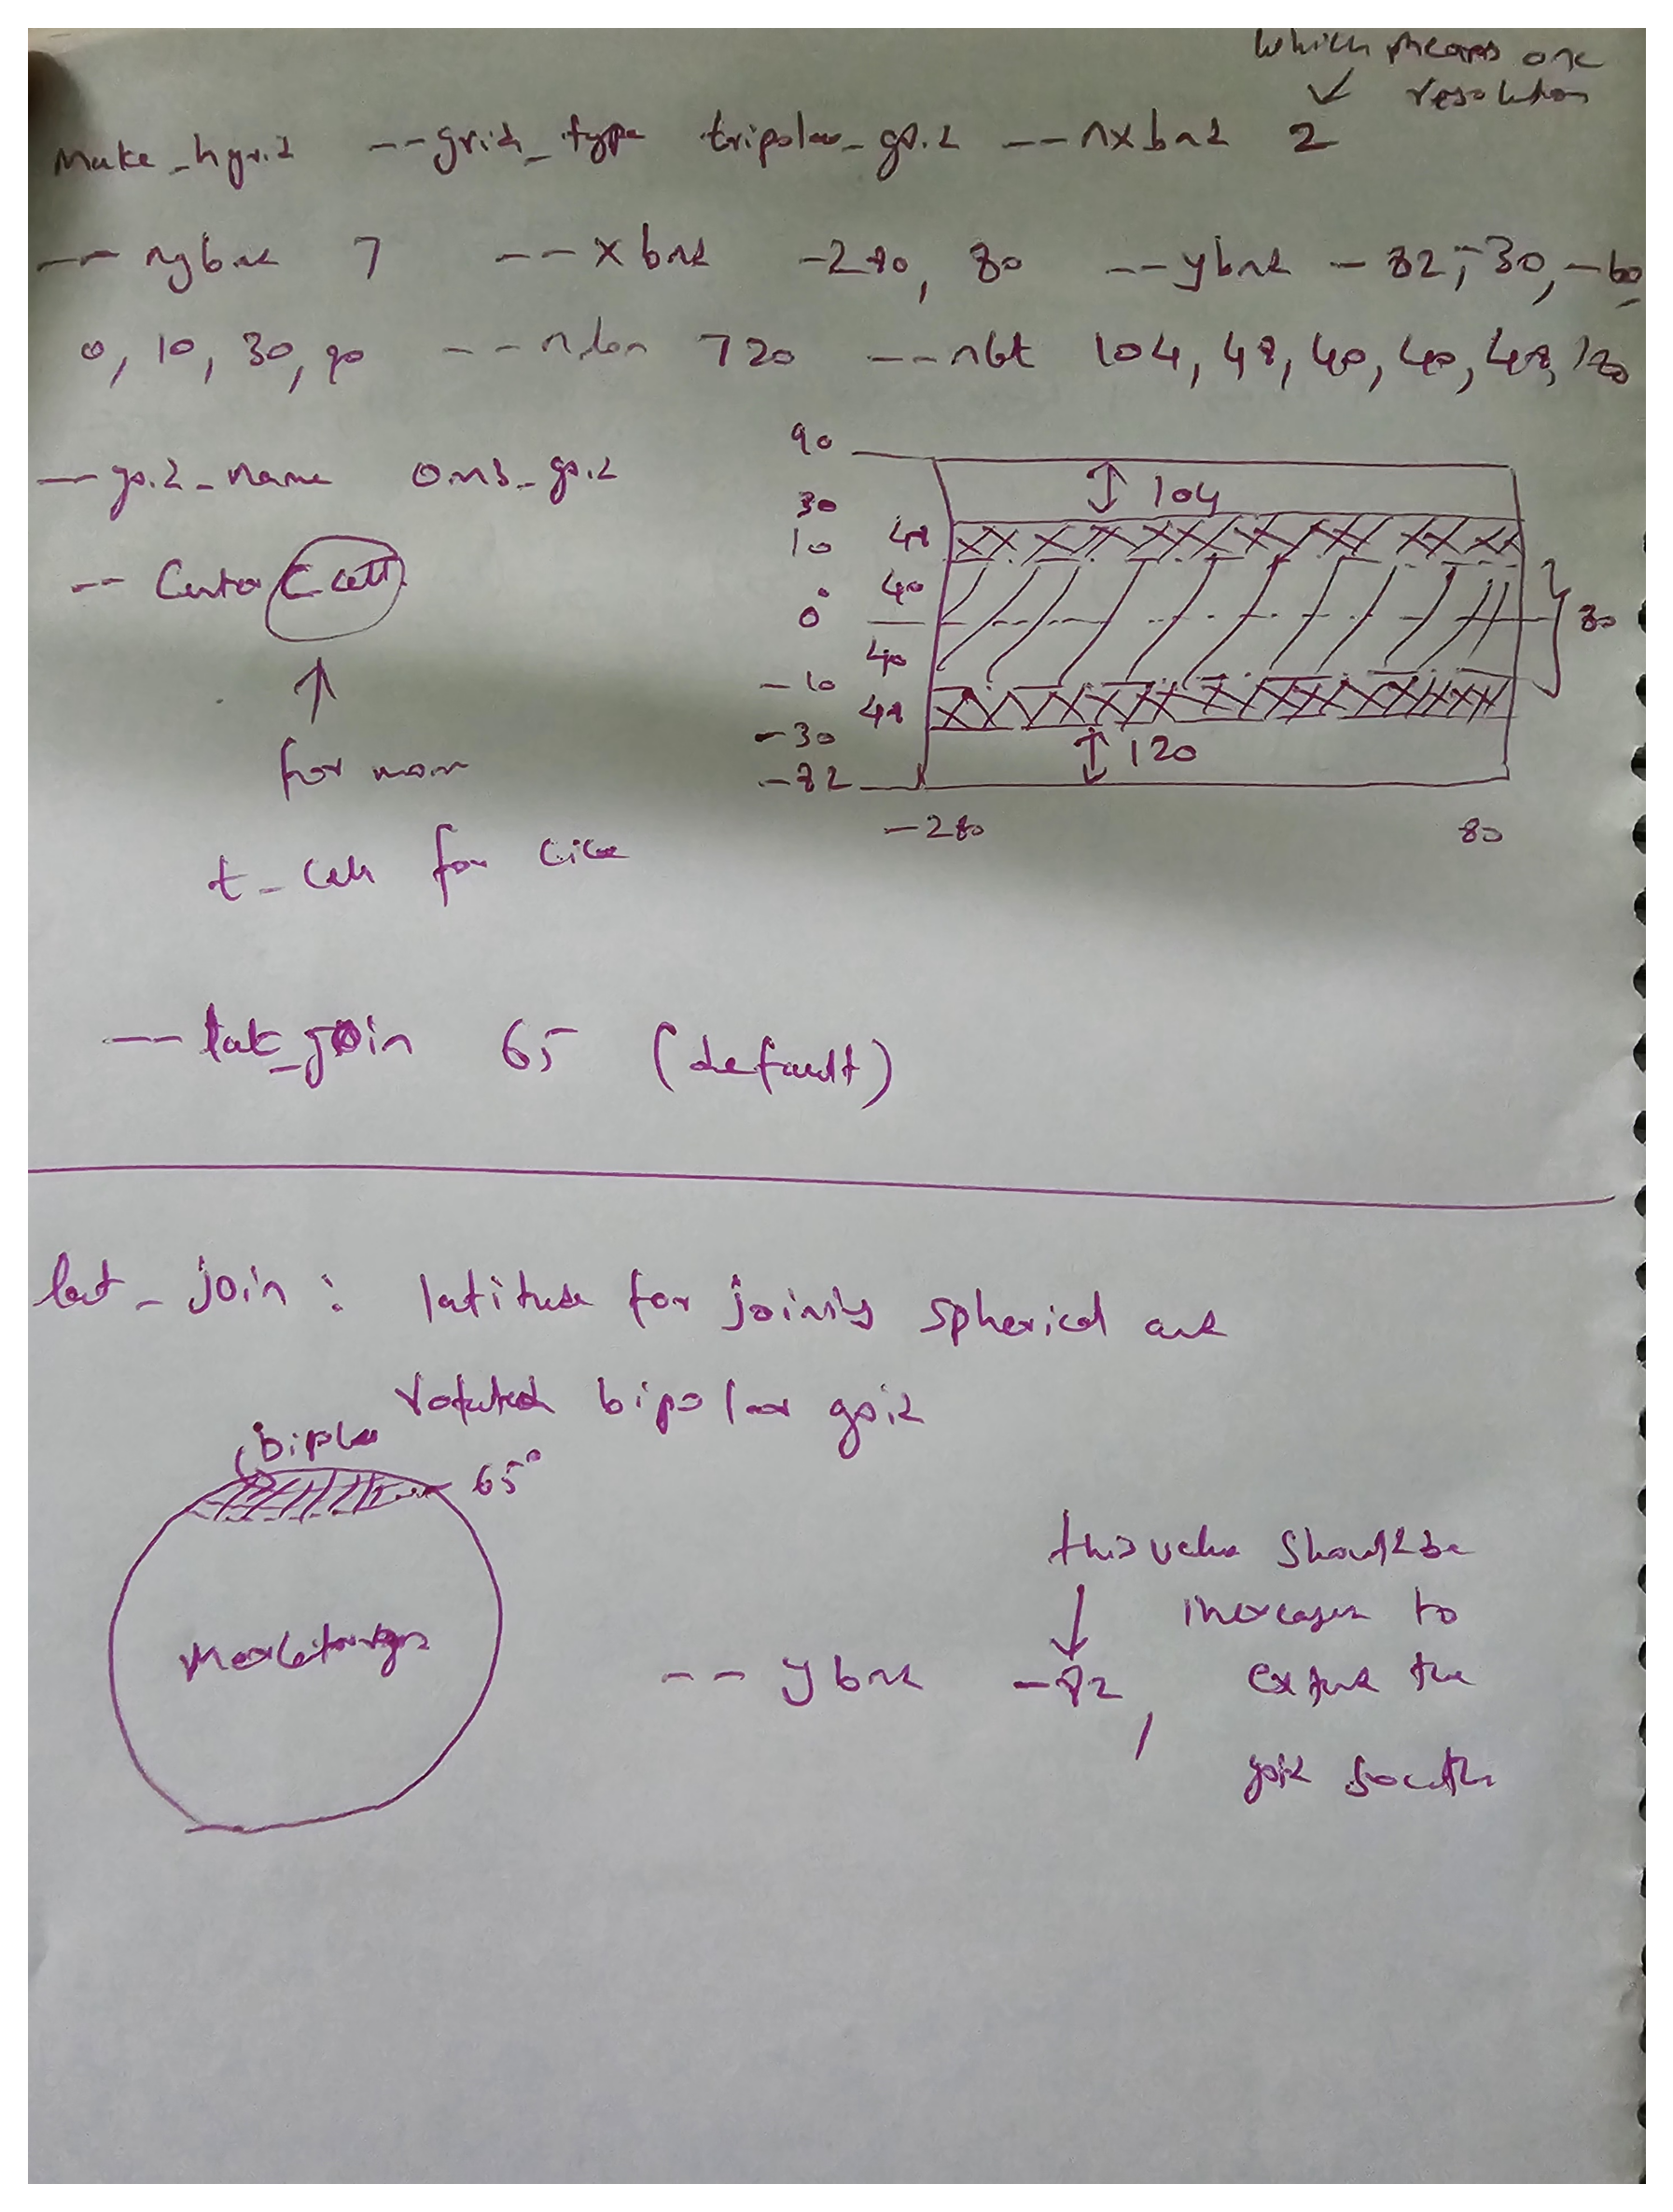

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

# Open an image file
image_path = '/g/data/tm70/ek4684/hgrids/make_hgrid_notes.jpg'  # replace with your image file path
image = Image.open(image_path)

# Display the image using matplotlib with higher DPI
plt.figure(figsize=(10, 10), dpi=300)  # Adjust figsize and dpi as needed
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

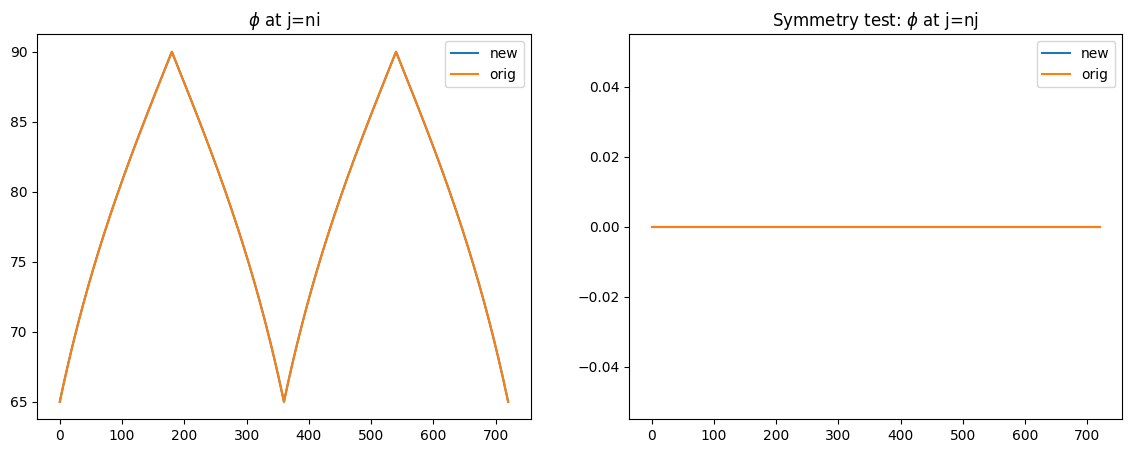

In [27]:
# Y top edge
plt.figure(figsize=(14,5));
plt.subplot(121)
plt.plot( New05['y'][-1,:], label='new' );
plt.plot( Orig05['y'][-1,:], label='orig' );
plt.title('$\phi$ at j=ni');
plt.legend();
# Y symmetry
plt.subplot(122)
plt.plot( New05['y'][-2,:] - New05['y'][-2,::-1], label='new' );
plt.plot( Orig05['y'][-1,:] - Orig05['y'][-1,::-1], label='orig' );
plt.title('Symmetry test: $\phi$ at j=nj');
plt.legend();

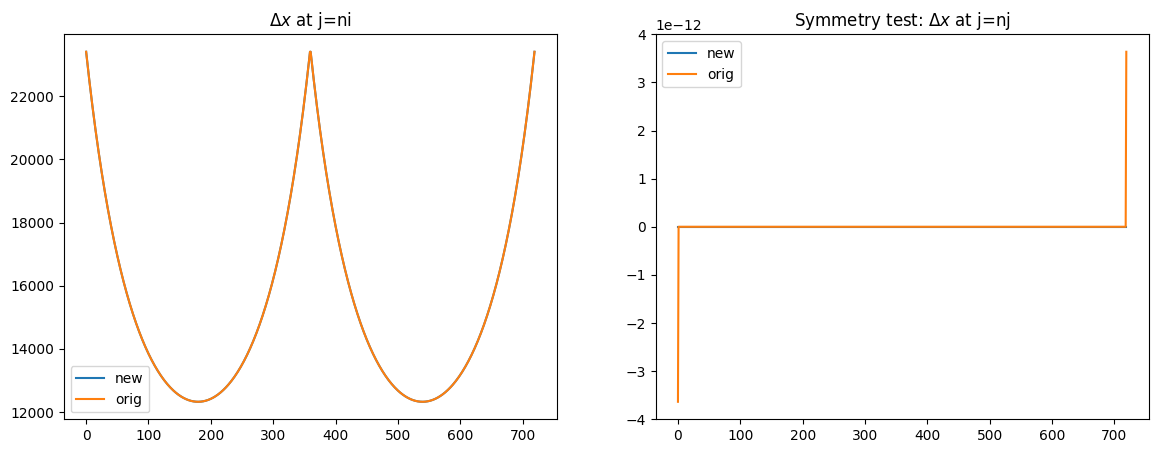

In [28]:
# DX top edge
plt.figure(figsize=(14,5));
plt.subplot(121)
plt.plot( New05['dx'][-1,:], label='new' );
plt.plot( Orig05['dx'][-1,:], label='orig' );
plt.title('$\Delta x$ at j=ni');
plt.legend();
# DX symmetry
plt.subplot(122)
plt.plot( New05['dx'][-2,:] - New05['dx'][-2,::-1], label='new' );
plt.plot( Orig05['dx'][-1,:] - Orig05['dx'][-1,::-1], label='orig' );
plt.title('Symmetry test: $\Delta x$ at j=nj');
plt.legend();

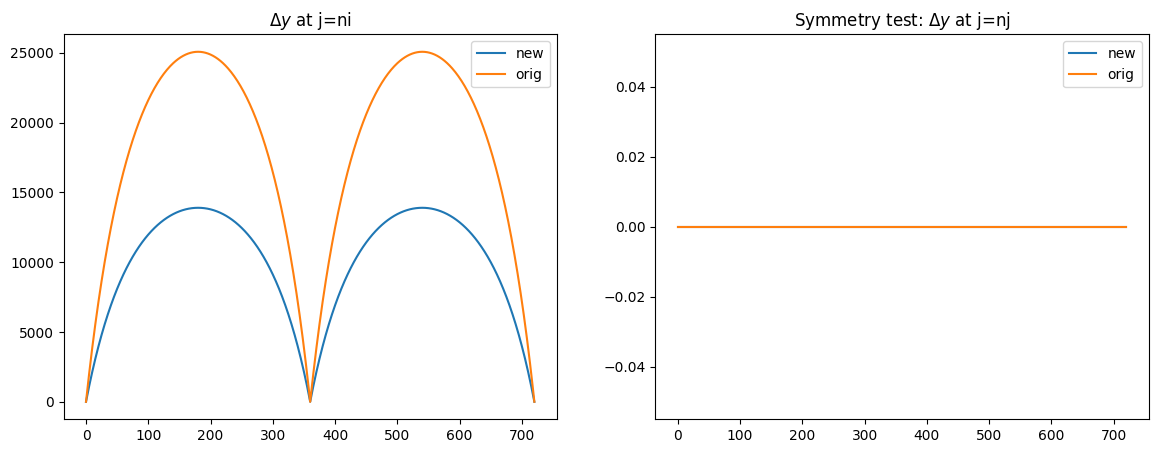

In [29]:
# DX top edge
plt.figure(figsize=(14,5));
plt.subplot(121)
plt.plot( New05['dy'][-1,:], label='new' );
plt.plot( Orig05['dy'][-1,:], label='orig' );
plt.title('$\Delta y$ at j=ni');
plt.legend();
# DX symmetry
plt.subplot(122)
plt.plot( New05['dy'][-1,:] - New05['dy'][-1,::-1], label='new' );
plt.plot( Orig05['dy'][-1,:] - Orig05['dy'][-1,::-1], label='orig' );
plt.title('Symmetry test: $\Delta y$ at j=nj');
plt.legend();

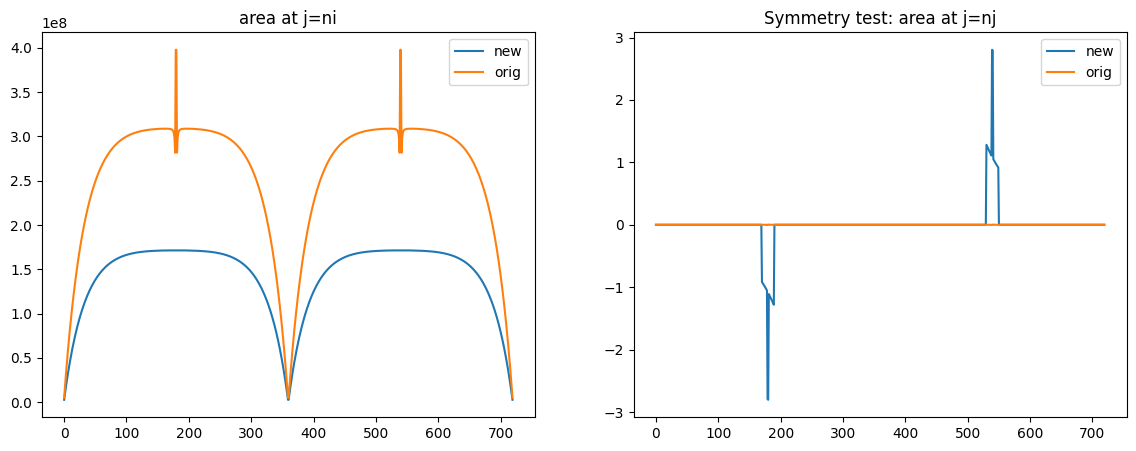

In [30]:
# AREA top edge
plt.figure(figsize=(14,5));
plt.subplot(121)
plt.plot(New05['area'][-1,:], label='new' );
plt.plot(Orig05['area'][-1,:], label='orig' );
plt.title('area at j=ni');
plt.legend();
# AREA symmetry
plt.subplot(122)
plt.plot( New05['area'][-1,:] - New05['area'][-1,::-1], label='new' );
plt.plot( Orig05['area'][-1,:] - Orig05['area'][-1,::-1], label='orig' );
plt.title('Symmetry test: area at j=nj');
plt.legend();

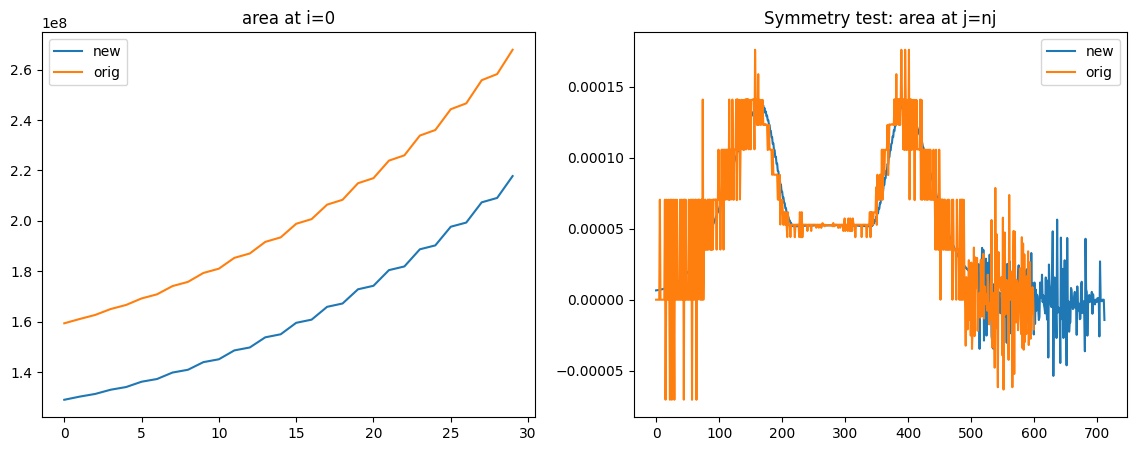

In [31]:
plt.figure(figsize=(14,5));
plt.subplot(121)
plt.plot( New05['area'][:30,0], label='new' );
plt.plot( Orig05['area'][:30,0], label='orig' );
plt.title('area at i=0');
plt.legend();
# AREA symmetry
plt.subplot(122)
plt.plot( New05['area'][:,-1] - New05['area'][:,0], label='new' );
plt.plot( Orig05['area'][:,-1] - Orig05['area'][:,0], label='orig' );
plt.title('Symmetry test: area at j=nj');
plt.legend();

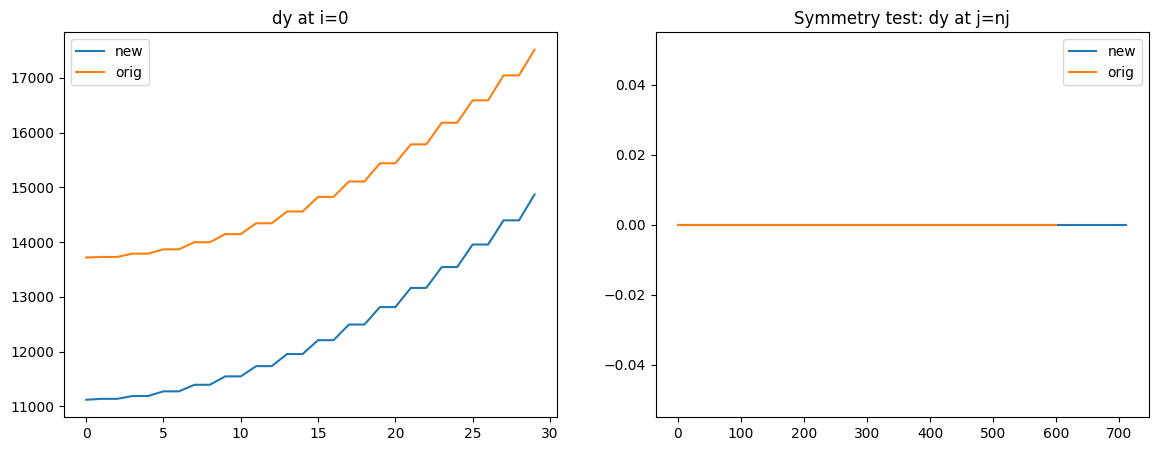

In [32]:
plt.figure(figsize=(14,5));
plt.subplot(121)
plt.plot( New05['dy'][:30,0], label='new' );
plt.plot( Orig05['dy'][:30,0], label='orig' );
plt.title('dy at i=0');
plt.legend();
# AREA symmetry
plt.subplot(122)
plt.plot( New05['dy'][:,-1] - New05['dy'][:,0], label='new' );
plt.plot( Orig05['dy'][:,-1] - Orig05['dy'][:,0], label='orig' );
plt.title('Symmetry test: dy at j=nj');
plt.legend();

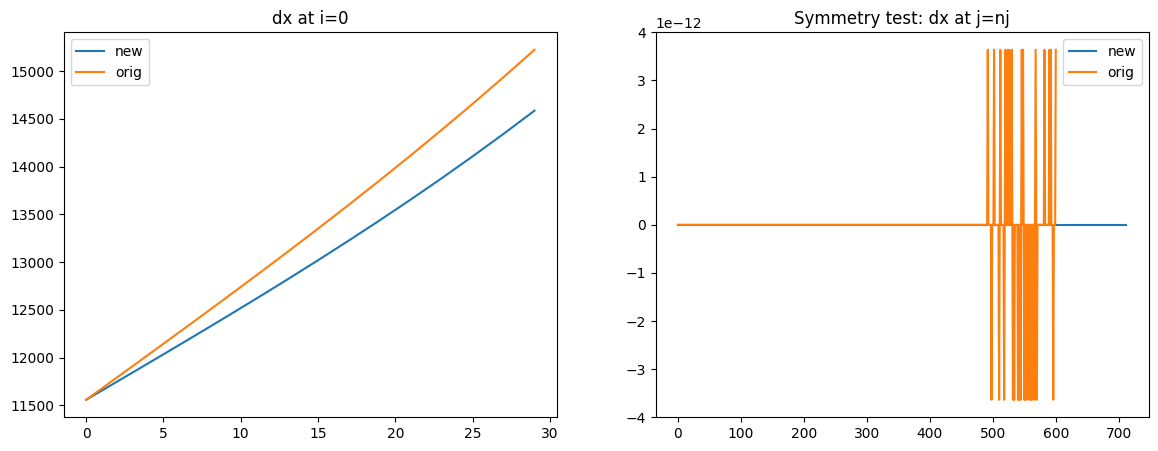

In [33]:
plt.figure(figsize=(14,5));
plt.subplot(121)
plt.plot( New05['dx'][:30,0], label='new' );
plt.plot( Orig05['dx'][:30,0], label='orig' );
plt.title('dx at i=0');
plt.legend();
# AREA symmetry
plt.subplot(122)
plt.plot( New05['dx'][:,-1] - New05['dx'][:,0], label='new' );
plt.plot( Orig05['dx'][:,-1] - Orig05['dx'][:,0], label='orig' );
plt.title('Symmetry test: dx at j=nj');
plt.legend();

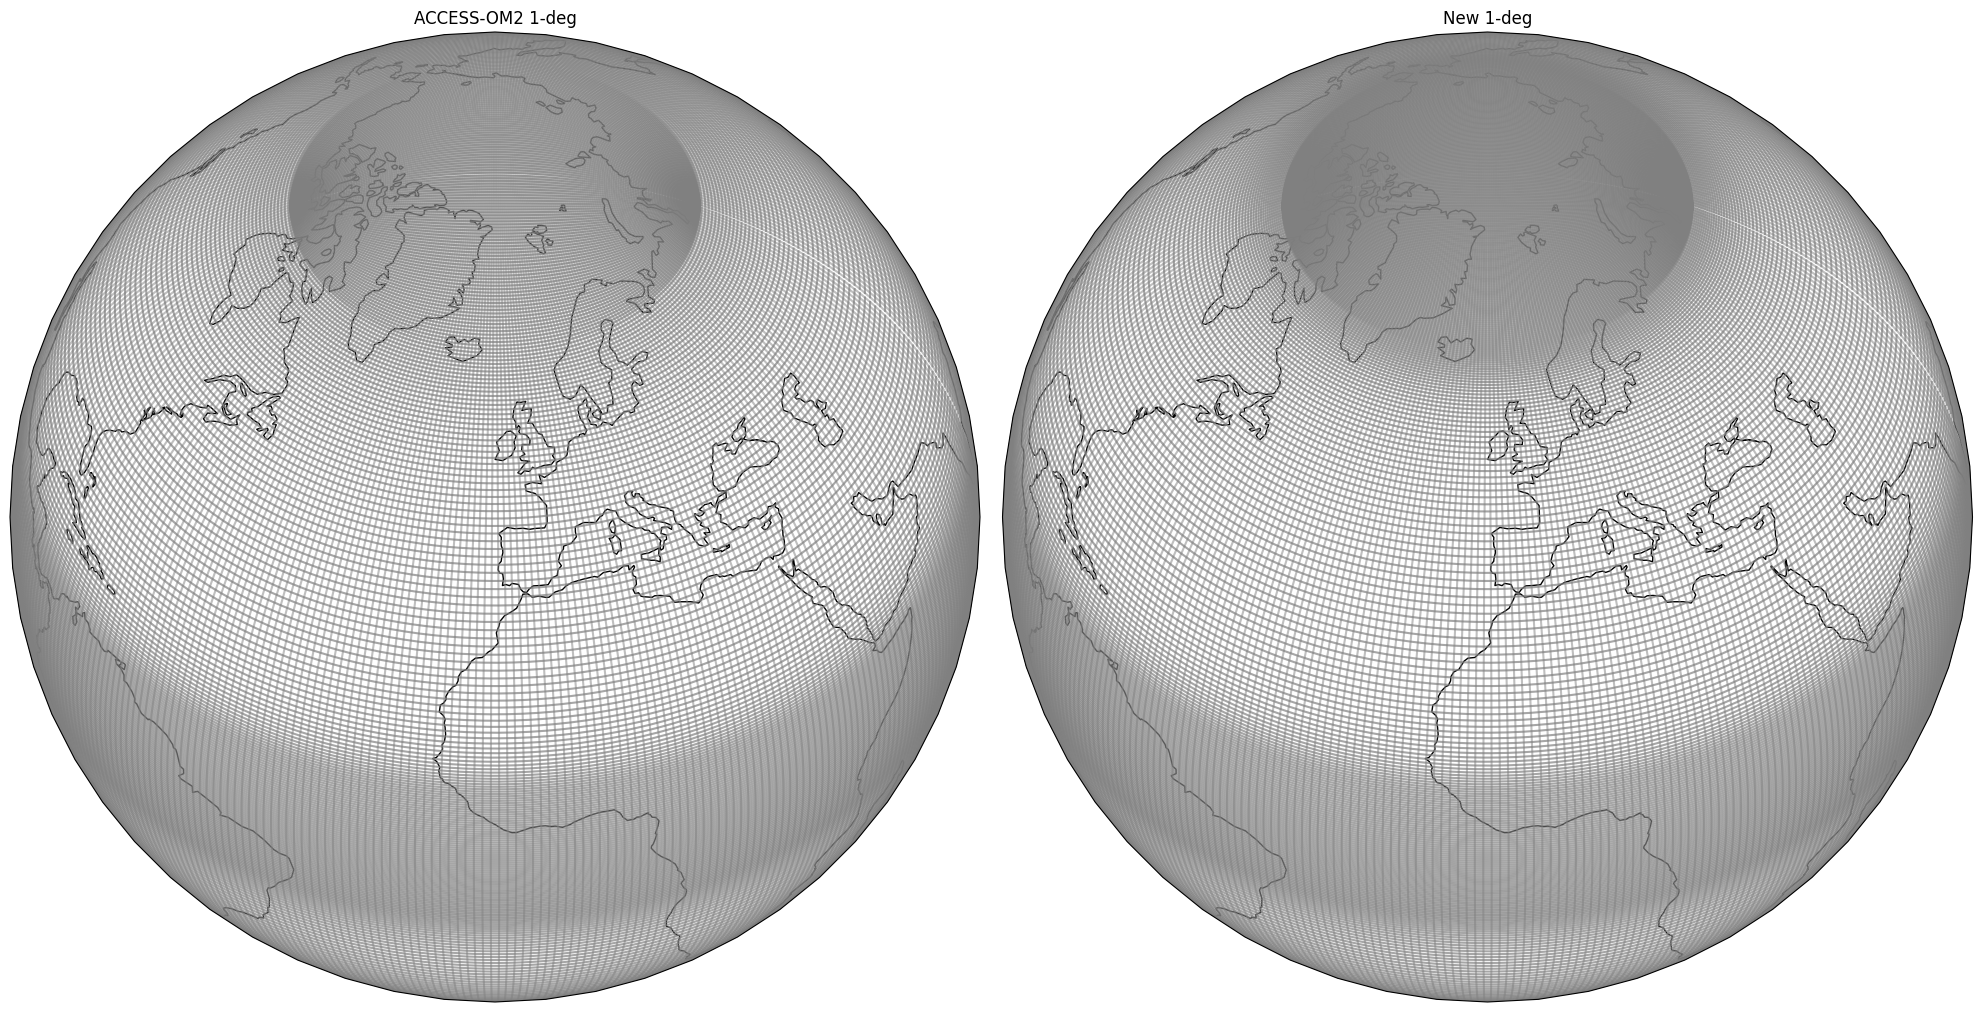

<Figure size 640x480 with 0 Axes>

In [34]:
import cartopy.crs as ccrs

# Define the subset of grid data
subset_x = Orig05.variables['x'][1::2, 1::2]
subset_y = Orig05.variables['y'][1::2, 1::2]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'projection': ccrs.Orthographic(-10, 45)})

# Plot on the first subplot
ax1 = axes[0]
ax1.set_global()
ax1.coastlines()
ax1.plot(subset_x, subset_y, transform=ccrs.PlateCarree(), color='grey', alpha=0.5)
ax1.plot(subset_x.transpose(), subset_y.transpose(), transform=ccrs.PlateCarree(), color='grey', alpha=0.7)
ax1.set_title('ACCESS-OM2 1-deg')

subset_x = New05.variables['x'][1::2, 1::2]
subset_y = New05.variables['y'][1::2, 1::2]

# Plot on the second subplot
ax2 = axes[1]
ax2.set_global()
ax2.coastlines()
ax2.plot(subset_x, subset_y, transform=ccrs.PlateCarree(), color='grey', alpha=0.5)
ax2.plot(subset_x.transpose(), subset_y.transpose(), transform=ccrs.PlateCarree(), color='grey', alpha=0.7)
ax2.set_title('New 1-deg')

# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig('/g/data/tm70/ek4684/hgrids/grid_tripole.png',dpi=300)

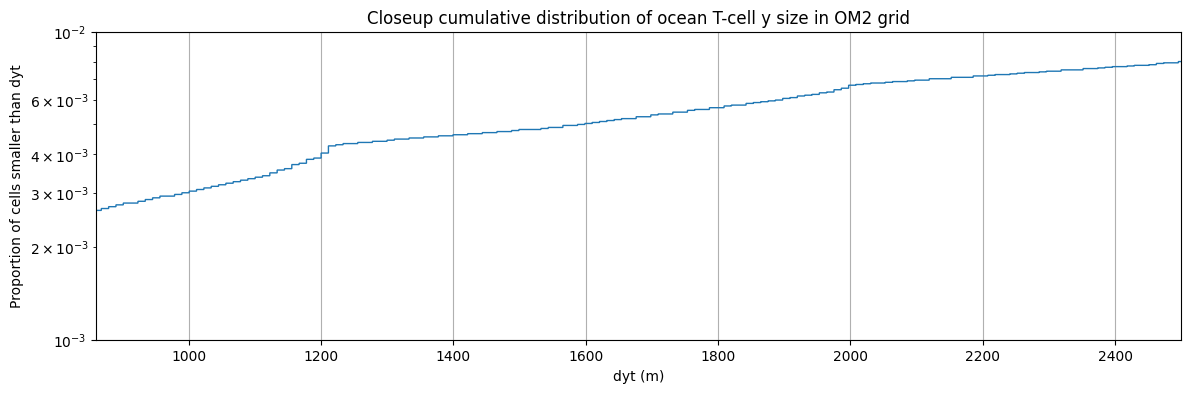

In [35]:
plt.figure(figsize=(14,4))
plt.hist(np.ma.ravel(Orig05.variables['dy'][1::2,1::2]), bins=5000, log=True, density=True, histtype='step', cumulative=True);
plt.xlim(860, 2500)
plt.ylim(1e-3,1e-2)
plt.grid()
plt.xlabel('dyt (m)')
plt.ylabel('Proportion of cells smaller than dyt');
plt.title('Closeup cumulative distribution of ocean T-cell y size in OM2 grid');

In [36]:
Orig05

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): string(255), nxp(721), nyp(601), nx(720), ny(600)
    variables(dimensions): |S1 tile(string), float64 x(nyp, nxp), float64 y(nyp, nxp), float64 dx(nyp, nx), float64 dy(ny, nxp), float64 angle_dx(nyp, nxp), float64 area(ny, nx)
    groups: 

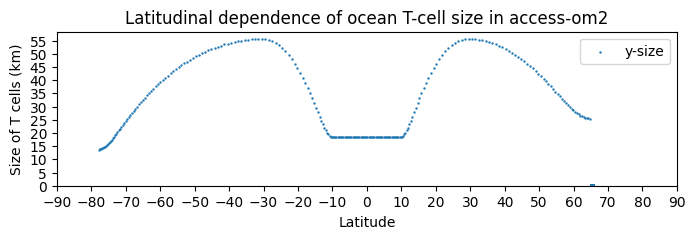

In [37]:
fig, ax = plt.subplots(figsize=(8, 2))
plt.scatter(geolat[:,1],dy[1::2,1]/1000,s=.5, label='y-size')
#plt.scatter(tlat_new05[:,1],dy_new[1::2,1]/1000,s=.5, label='y-size')
plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(-90,90)
plt.xticks(range(-90,91,10))
plt.yticks(range(0,60,5))
plt.ylabel('Size of T cells (km)')
plt.xlabel('Latitude');
plt.title('Latitudinal dependence of ocean T-cell size in access-om2');
ax.legend(loc='upper right')
#plt.savefig('grid_scatter_'+ekey+'.png',dpi=300, bbox_inches="tight")

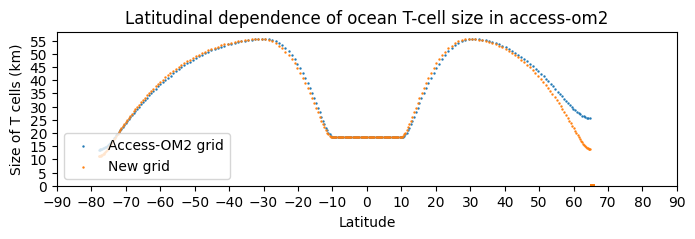

In [38]:
fig, ax = plt.subplots(figsize=(8, 2))
plt.scatter(y[1::2,1],dy[::2,1]/1000,s=.5, label='Access-OM2 grid')
plt.scatter(tlat_new05[:,1],dy_new[1::2,1]/1000,s=.5, label='New grid')
plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(-90,90)
plt.xticks(range(-90,91,10))
plt.yticks(range(0,60,5))
plt.ylabel('Size of T cells (km)')
plt.xlabel('Latitude');
plt.title('Latitudinal dependence of ocean T-cell size in access-om2');
ax.legend(loc='lower left')
plt.savefig('/g/data/tm70/ek4684/hgrids/grid_scatter.png',dpi=300, bbox_inches="tight")